# Signals, Frequencies and the Fourier Transform

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import math

In [3]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [14]:
def generate_wave(frequency, amplitude, time, shift, sampling_rate):
    
    t = np.arange(0, time, time/sampling_rate)
    X = amplitude*np.sin(2*np.pi*frequency*t + shift)
    
    return t, X

In [33]:
def plot_wave(time, signal, color='b'):
    fig = plt.figure(figsize=(15, 5))

    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_ylim([-4, 4])

    ax.plot(time, signal, c=color)
    plt.grid(True, which="both")
    
    plt.show()

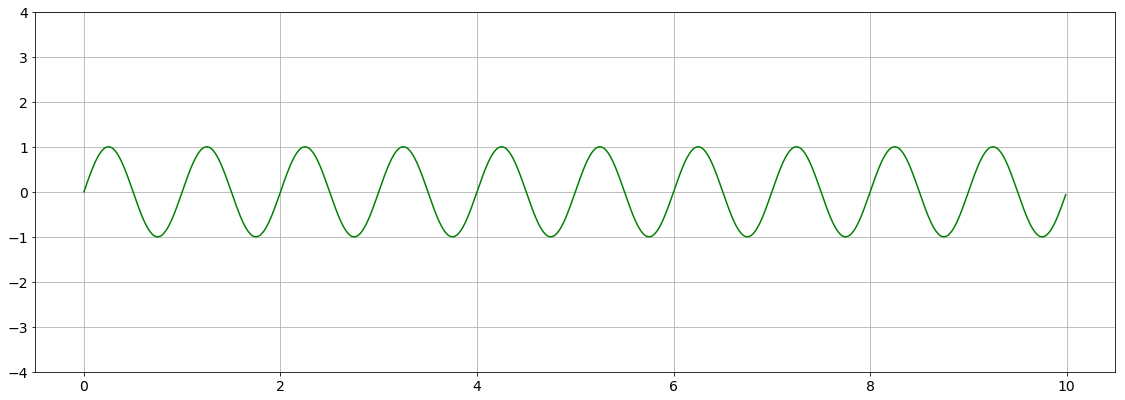

In [37]:
time, s1 = generate_wave(1, 1, 10, 0, 1000)
plot_wave(time, s1, 'g')

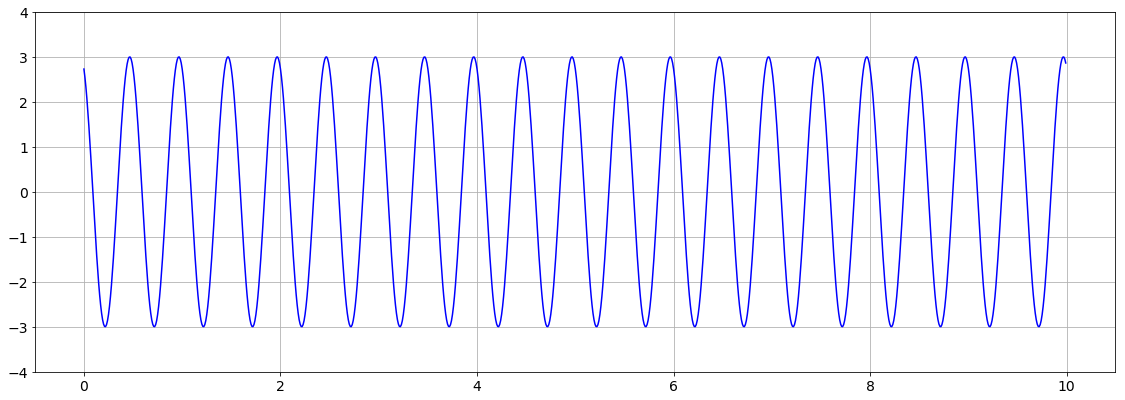

In [38]:
time, s2 = generate_wave(2, 3, 10, 2, 1000)
plot_wave(time, s2)

#### Combining Signals

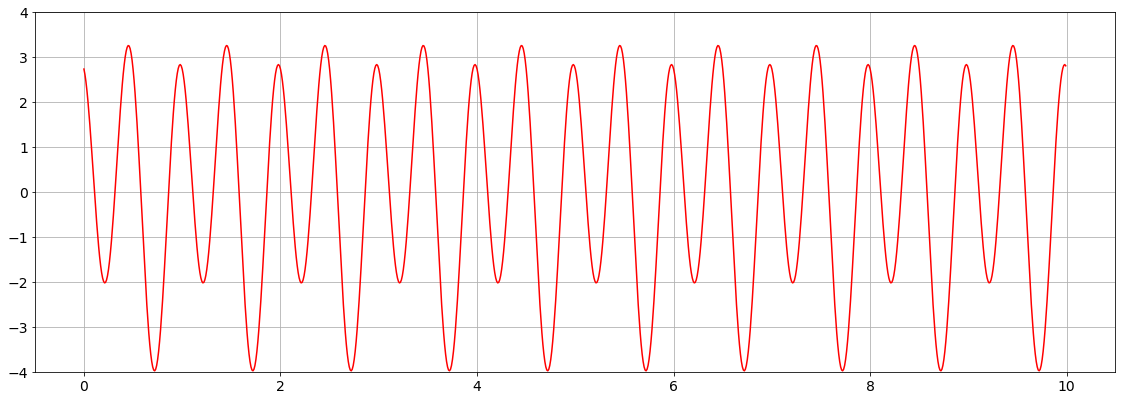

In [39]:
plot_wave(time, s1+s2, 'r')

#### Sampling Rate

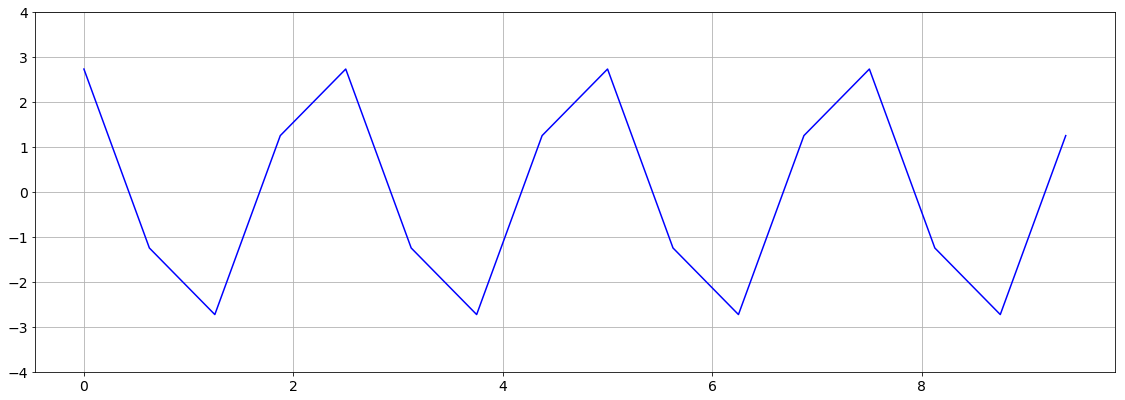

In [41]:
time, s2 = generate_wave(2, 3, 10, 2, 16)
plot_wave(time, s2)

#### Fast Fourier Transform

In [60]:
def fast_fourier_transform(time, signal, sr=50):
    f, axarr = plt.subplots(2, figsize=(20, 8))

    axarr[0].plot(time, signal)

    n = len(signal)
    p = fft(signal)

    mag = np.sqrt(p.real**2 + p.imag**2)
    mag = mag * 2 / n
    mag = mag[0:math.ceil((n)/2.0)]
    x = np.arange(0, len(mag), 1.0) * (sr / n)

    axarr[1].bar(x, mag, color='r')
    axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

    plt.show()

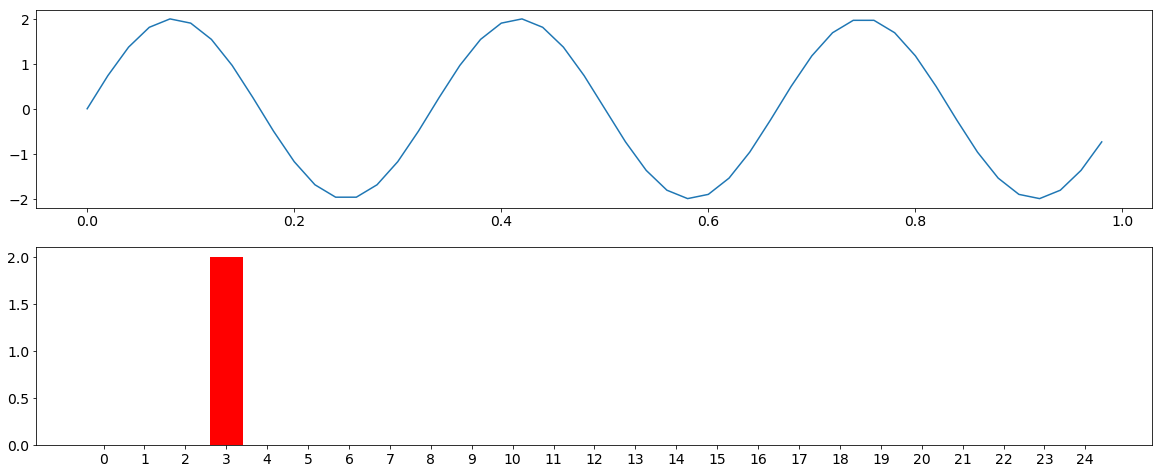

In [59]:
t, s1 = generate_wave(3, 2, 1, 0, 50)
fast_fourier_transform(t, s1, sr=50)

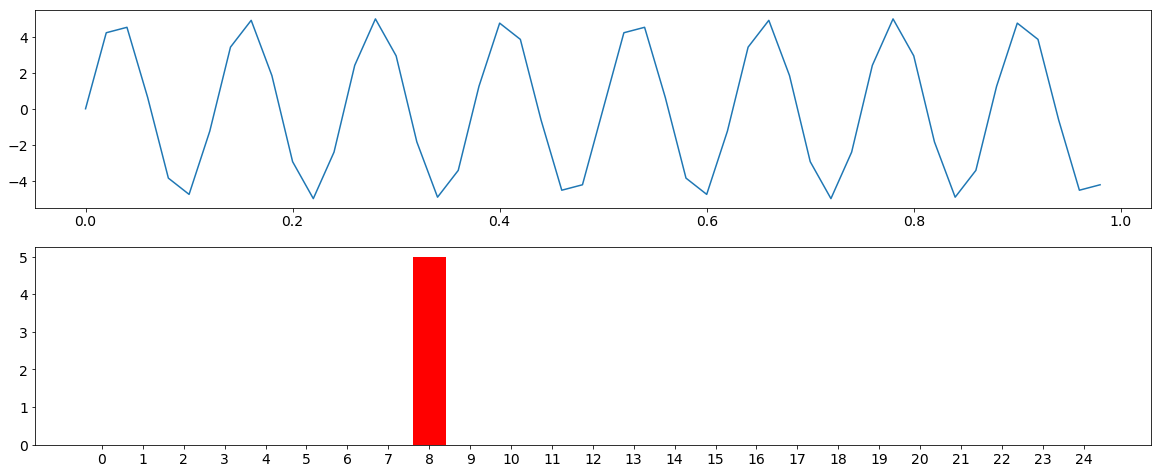

In [63]:
t, s2 = generate_wave(8, 5, 1, 0, 50)
fast_fourier_transform(t, s2, sr=50)

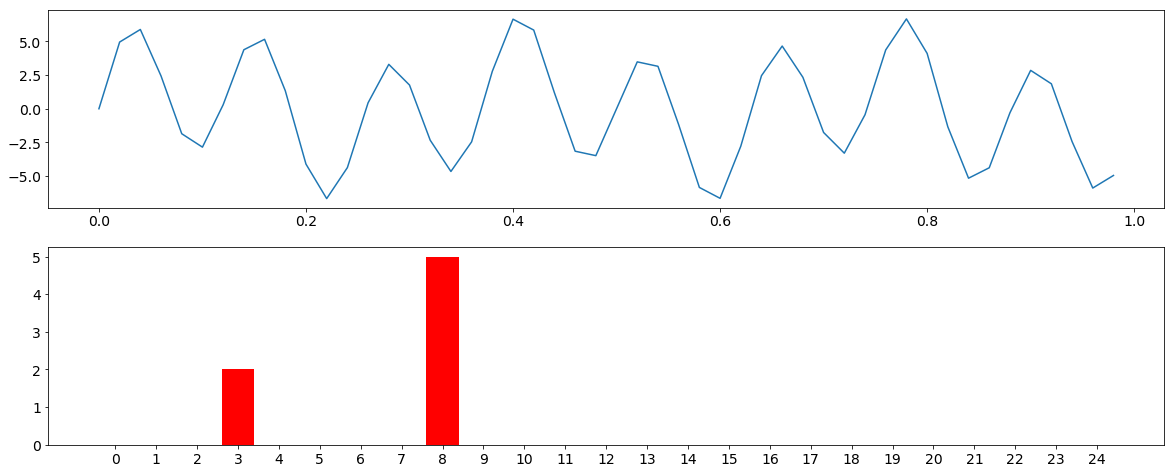

In [64]:
fast_fourier_transform(t, s1+s2, sr=50)